# Version

In [1]:
i = 5

# Import python dataset

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [3]:
# Preprocessing

scenario= "sinus" #sinus, helix
#n_instance = 1000
n_instance = 1000
n_features = 2
Z = 6 #3的倍數
nodes = 8 #4
var = 4
use_bias = 'True'
scales = ['-1-1','0-1']
scaled = '-1-1'

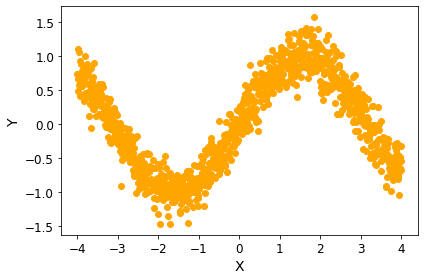

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [6]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, var, n_features, use_bias)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         2048        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1024)         4096        dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 1024)         0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [7]:
import AAE_Model

GANorWGAN='WGAN' #GAN
epochs = 2000 #2000
batch_size = 100

In [8]:
aae = AAE_Model.AAE(i, Z, n_features, batch_size, GANorWGAN, nodes, var, use_bias)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 1024)         2048        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 1024)         4096        dense_11[0][0]                   
__________________________________________________________________________________________________
re_lu_11 (ReLU)                 (None, 1024)         0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [9]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


### latent variable

## Training

1 [D real: -0.487808, D fake: 0.519029], [Enc/Dec loss: 0.573836, Enc/Dis: 0.579523]
2 [D real: -0.495592, D fake: 0.522446], [Enc/Dec loss: 0.352840, Enc/Dis: 0.358225]
3 [D real: -0.510981, D fake: 0.530587], [Enc/Dec loss: 0.277295, Enc/Dis: 0.282565]
4 [D real: -0.516084, D fake: 0.534379], [Enc/Dec loss: 0.198007, Enc/Dis: 0.203188]
5 [D real: -0.525385, D fake: 0.537889], [Enc/Dec loss: 0.177486, Enc/Dis: 0.182635]
6 [D real: -0.529801, D fake: 0.538169], [Enc/Dec loss: 0.146531, Enc/Dis: 0.151682]
7 [D real: -0.531990, D fake: 0.539190], [Enc/Dec loss: 0.141370, Enc/Dis: 0.146546]
8 [D real: -0.534987, D fake: 0.541342], [Enc/Dec loss: 0.118334, Enc/Dis: 0.123527]
9 [D real: -0.538387, D fake: 0.543215], [Enc/Dec loss: 0.114841, Enc/Dis: 0.120036]
10 [D real: -0.539304, D fake: 0.545237], [Enc/Dec loss: 0.106700, Enc/Dis: 0.111861]
11 [D real: -0.553649, D fake: 0.548186], [Enc/Dec loss: 0.108424, Enc/Dis: 0.113560]
12 [D real: -0.548135, D fake: 0.554119], [Enc/Dec loss: 0.1020

94 [D real: -0.563340, D fake: 0.570218], [Enc/Dec loss: 0.069887, Enc/Dis: 0.072708]
95 [D real: -0.563550, D fake: 0.569124], [Enc/Dec loss: 0.059129, Enc/Dis: 0.064399]
96 [D real: -0.563862, D fake: 0.573228], [Enc/Dec loss: 0.067824, Enc/Dis: 0.071812]
97 [D real: -0.567280, D fake: 0.569690], [Enc/Dec loss: 0.057852, Enc/Dis: 0.061373]
98 [D real: -0.567044, D fake: 0.568863], [Enc/Dec loss: 0.058390, Enc/Dis: 0.063916]
99 [D real: -0.567144, D fake: 0.566920], [Enc/Dec loss: 0.066028, Enc/Dis: 0.068520]
100 [D real: -0.568474, D fake: 0.566386], [Enc/Dec loss: 0.064189, Enc/Dis: 0.069144]
101 [D real: -0.586672, D fake: 0.564896], [Enc/Dec loss: 0.064454, Enc/Dis: 0.069519]
102 [D real: -0.589374, D fake: 0.565213], [Enc/Dec loss: 0.068810, Enc/Dis: 0.074209]
103 [D real: -0.586281, D fake: 0.572413], [Enc/Dec loss: 0.060852, Enc/Dis: 0.066330]
104 [D real: -0.585201, D fake: 0.565936], [Enc/Dec loss: 0.066148, Enc/Dis: 0.068613]
105 [D real: -0.577040, D fake: 0.561660], [Enc/D

189 [D real: -0.569810, D fake: 0.573851], [Enc/Dec loss: 0.060722, Enc/Dis: 0.064316]
190 [D real: -0.571740, D fake: 0.573760], [Enc/Dec loss: 0.061950, Enc/Dis: 0.064349]
191 [D real: -0.605744, D fake: 0.575206], [Enc/Dec loss: 0.048219, Enc/Dis: 0.054288]
192 [D real: -0.593359, D fake: 0.575088], [Enc/Dec loss: 0.065232, Enc/Dis: 0.067802]
193 [D real: -0.577349, D fake: 0.570505], [Enc/Dec loss: 0.062700, Enc/Dis: 0.067969]
194 [D real: -0.576592, D fake: 0.569245], [Enc/Dec loss: 0.060205, Enc/Dis: 0.064348]
195 [D real: -0.574326, D fake: 0.573375], [Enc/Dec loss: 0.054612, Enc/Dis: 0.060473]
196 [D real: -0.574222, D fake: 0.576835], [Enc/Dec loss: 0.066744, Enc/Dis: 0.070681]
197 [D real: -0.571969, D fake: 0.572749], [Enc/Dec loss: 0.068843, Enc/Dis: 0.072755]
198 [D real: -0.575479, D fake: 0.573094], [Enc/Dec loss: 0.057517, Enc/Dis: 0.064819]
199 [D real: -0.573238, D fake: 0.573663], [Enc/Dec loss: 0.055825, Enc/Dis: 0.064014]
200 [D real: -0.571339, D fake: 0.574535], 

284 [D real: -0.557376, D fake: 0.552921], [Enc/Dec loss: 0.057673, Enc/Dis: 0.064077]
285 [D real: -0.561980, D fake: 0.552454], [Enc/Dec loss: 0.055801, Enc/Dis: 0.061812]
286 [D real: -0.566708, D fake: 0.554942], [Enc/Dec loss: 0.050156, Enc/Dis: 0.056420]
287 [D real: -0.568879, D fake: 0.558052], [Enc/Dec loss: 0.057710, Enc/Dis: 0.063874]
288 [D real: -0.566802, D fake: 0.555296], [Enc/Dec loss: 0.059657, Enc/Dis: 0.065182]
289 [D real: -0.565656, D fake: 0.557385], [Enc/Dec loss: 0.055224, Enc/Dis: 0.058457]
290 [D real: -0.563927, D fake: 0.556433], [Enc/Dec loss: 0.057137, Enc/Dis: 0.060484]
291 [D real: -0.574553, D fake: 0.567421], [Enc/Dec loss: 0.059008, Enc/Dis: 0.063075]
292 [D real: -0.566472, D fake: 0.568419], [Enc/Dec loss: 0.056683, Enc/Dis: 0.061686]
293 [D real: -0.562824, D fake: 0.560865], [Enc/Dec loss: 0.051526, Enc/Dis: 0.056696]
294 [D real: -0.567044, D fake: 0.560303], [Enc/Dec loss: 0.051170, Enc/Dis: 0.056630]
295 [D real: -0.565932, D fake: 0.557615], 

379 [D real: -0.524500, D fake: 0.509448], [Enc/Dec loss: 0.053157, Enc/Dis: 0.060263]
380 [D real: -0.527002, D fake: 0.508406], [Enc/Dec loss: 0.047980, Enc/Dis: 0.053032]
381 [D real: -0.520222, D fake: 0.499045], [Enc/Dec loss: 0.051422, Enc/Dis: 0.055888]
382 [D real: -0.514806, D fake: 0.510541], [Enc/Dec loss: 0.051020, Enc/Dis: 0.056638]
383 [D real: -0.526447, D fake: 0.504027], [Enc/Dec loss: 0.056201, Enc/Dis: 0.061791]
384 [D real: -0.519541, D fake: 0.515837], [Enc/Dec loss: 0.057747, Enc/Dis: 0.064004]
385 [D real: -0.521026, D fake: 0.515619], [Enc/Dec loss: 0.050417, Enc/Dis: 0.056831]
386 [D real: -0.523233, D fake: 0.508919], [Enc/Dec loss: 0.060195, Enc/Dis: 0.064105]
387 [D real: -0.521025, D fake: 0.505232], [Enc/Dec loss: 0.069598, Enc/Dis: 0.072038]
388 [D real: -0.514697, D fake: 0.505603], [Enc/Dec loss: 0.053425, Enc/Dis: 0.059139]
389 [D real: -0.516603, D fake: 0.506460], [Enc/Dec loss: 0.049156, Enc/Dis: 0.054671]
390 [D real: -0.517680, D fake: 0.506208], 

474 [D real: -0.558803, D fake: 0.426250], [Enc/Dec loss: 0.053873, Enc/Dis: 0.059784]
475 [D real: -0.549882, D fake: 0.419705], [Enc/Dec loss: 0.055101, Enc/Dis: 0.060627]
476 [D real: -0.556527, D fake: 0.416461], [Enc/Dec loss: 0.054958, Enc/Dis: 0.060598]
477 [D real: -0.552773, D fake: 0.404561], [Enc/Dec loss: 0.052620, Enc/Dis: 0.056122]
478 [D real: -0.555955, D fake: 0.400673], [Enc/Dec loss: 0.054031, Enc/Dis: 0.058785]
479 [D real: -0.563117, D fake: 0.398733], [Enc/Dec loss: 0.048138, Enc/Dis: 0.056744]
480 [D real: -0.562525, D fake: 0.396004], [Enc/Dec loss: 0.048642, Enc/Dis: 0.055431]
481 [D real: -0.596520, D fake: 0.379745], [Enc/Dec loss: 0.061283, Enc/Dis: 0.063274]
482 [D real: -0.582715, D fake: 0.386852], [Enc/Dec loss: 0.056384, Enc/Dis: 0.062735]
483 [D real: -0.572495, D fake: 0.403398], [Enc/Dec loss: 0.058489, Enc/Dis: 0.062584]
484 [D real: -0.576115, D fake: 0.399597], [Enc/Dec loss: 0.056785, Enc/Dis: 0.059001]
485 [D real: -0.572326, D fake: 0.409665], 

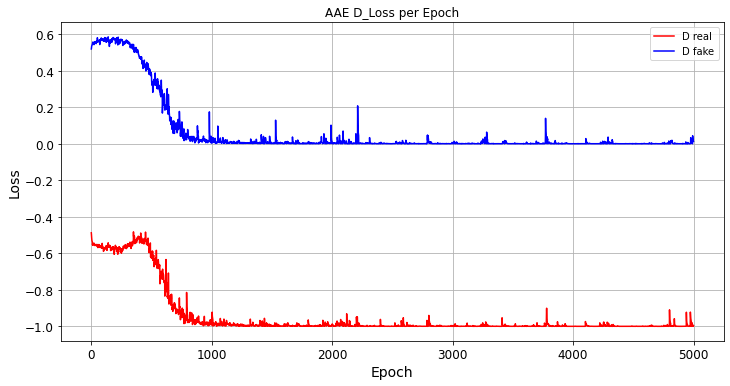

G_Loss: 


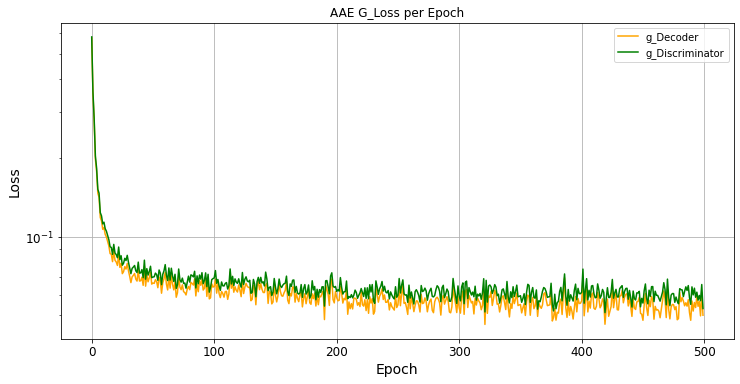

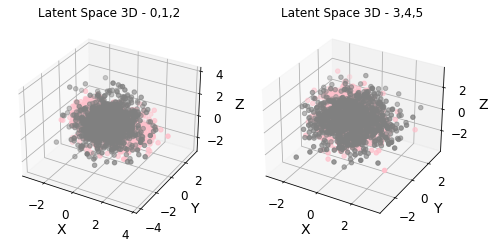

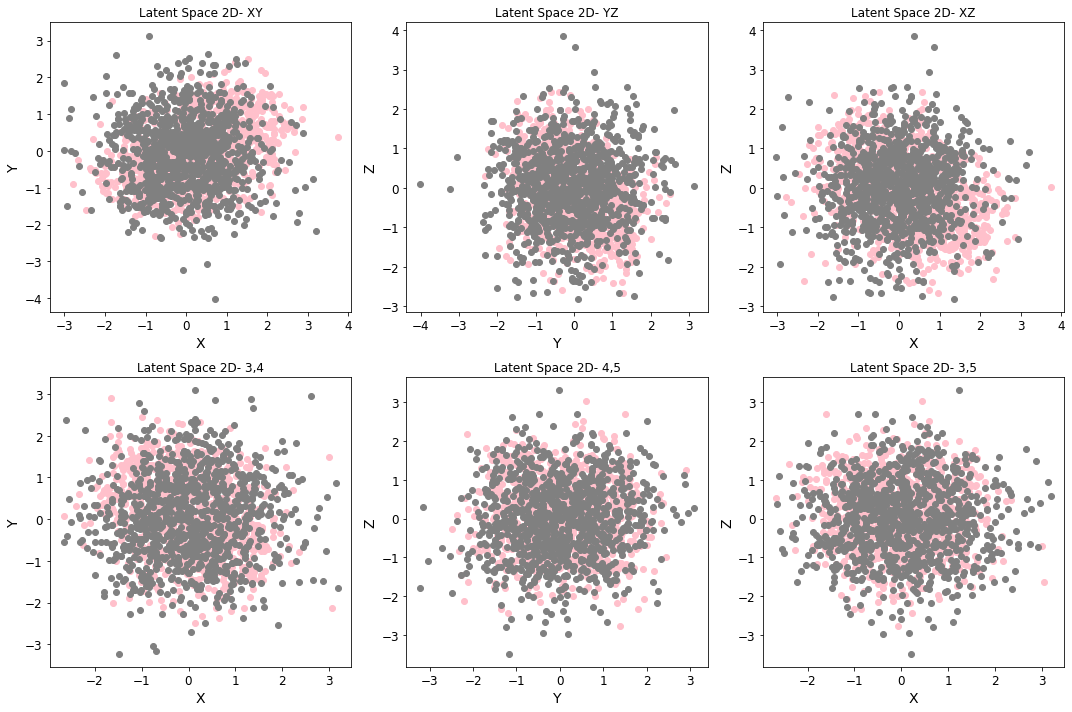

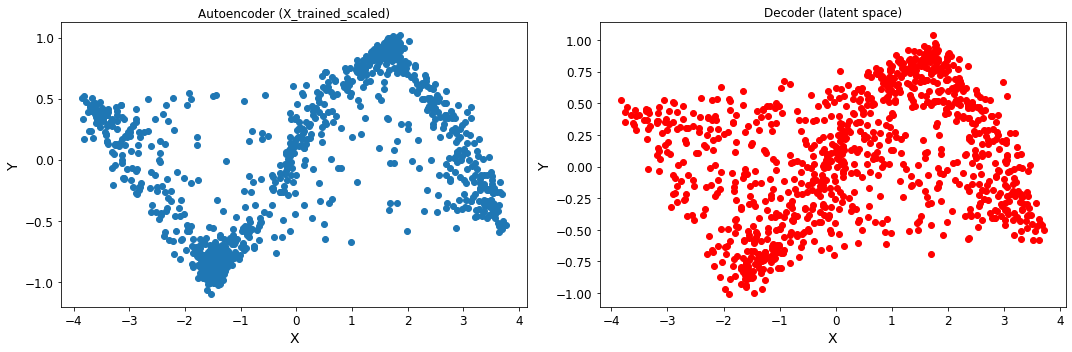

encoder output shape (1000, 6)


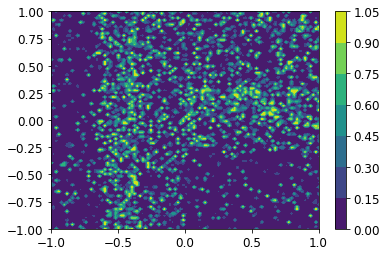

501 [D real: -0.613797, D fake: 0.350778], [Enc/Dec loss: 0.059573, Enc/Dis: 0.060714]
502 [D real: -0.628020, D fake: 0.342246], [Enc/Dec loss: 0.059290, Enc/Dis: 0.061017]
503 [D real: -0.604626, D fake: 0.326066], [Enc/Dec loss: 0.060127, Enc/Dis: 0.061892]
504 [D real: -0.590304, D fake: 0.320904], [Enc/Dec loss: 0.054804, Enc/Dis: 0.056529]
505 [D real: -0.592994, D fake: 0.326188], [Enc/Dec loss: 0.053405, Enc/Dis: 0.057154]
506 [D real: -0.588455, D fake: 0.328129], [Enc/Dec loss: 0.060581, Enc/Dis: 0.063906]
507 [D real: -0.589369, D fake: 0.332984], [Enc/Dec loss: 0.055092, Enc/Dis: 0.059414]
508 [D real: -0.594798, D fake: 0.333766], [Enc/Dec loss: 0.052861, Enc/Dis: 0.058297]
509 [D real: -0.596494, D fake: 0.329421], [Enc/Dec loss: 0.054956, Enc/Dis: 0.061447]
510 [D real: -0.589189, D fake: 0.326486], [Enc/Dec loss: 0.058226, Enc/Dis: 0.066085]
511 [D real: -0.611471, D fake: 0.281297], [Enc/Dec loss: 0.046653, Enc/Dis: 0.053387]
512 [D real: -0.627392, D fake: 0.331670], 

596 [D real: -0.709927, D fake: 0.212910], [Enc/Dec loss: 0.057165, Enc/Dis: 0.061532]
597 [D real: -0.728023, D fake: 0.221592], [Enc/Dec loss: 0.053190, Enc/Dis: 0.057331]
598 [D real: -0.716628, D fake: 0.221643], [Enc/Dec loss: 0.054674, Enc/Dis: 0.059224]
599 [D real: -0.714286, D fake: 0.218372], [Enc/Dec loss: 0.059613, Enc/Dis: 0.065170]
600 [D real: -0.719626, D fake: 0.218413], [Enc/Dec loss: 0.052764, Enc/Dis: 0.058275]
601 [D real: -0.721555, D fake: 0.236777], [Enc/Dec loss: 0.055262, Enc/Dis: 0.061165]
602 [D real: -0.741029, D fake: 0.217888], [Enc/Dec loss: 0.050897, Enc/Dis: 0.058035]
603 [D real: -0.746848, D fake: 0.243843], [Enc/Dec loss: 0.048251, Enc/Dis: 0.056460]
604 [D real: -0.754066, D fake: 0.256031], [Enc/Dec loss: 0.051085, Enc/Dis: 0.059615]
605 [D real: -0.757178, D fake: 0.265047], [Enc/Dec loss: 0.049668, Enc/Dis: 0.057757]
606 [D real: -0.749734, D fake: 0.272732], [Enc/Dec loss: 0.051710, Enc/Dis: 0.059527]
607 [D real: -0.757276, D fake: 0.274751], 

691 [D real: -0.870310, D fake: 0.056468], [Enc/Dec loss: 0.053456, Enc/Dis: 0.056989]
692 [D real: -0.882636, D fake: 0.101543], [Enc/Dec loss: 0.051428, Enc/Dis: 0.058006]
693 [D real: -0.876580, D fake: 0.093183], [Enc/Dec loss: 0.057902, Enc/Dis: 0.062473]
694 [D real: -0.887968, D fake: 0.092229], [Enc/Dec loss: 0.059436, Enc/Dis: 0.063984]
695 [D real: -0.885026, D fake: 0.085405], [Enc/Dec loss: 0.048328, Enc/Dis: 0.055035]
696 [D real: -0.884172, D fake: 0.085557], [Enc/Dec loss: 0.048991, Enc/Dis: 0.055511]
697 [D real: -0.887113, D fake: 0.083181], [Enc/Dec loss: 0.056895, Enc/Dis: 0.060943]
698 [D real: -0.889126, D fake: 0.086652], [Enc/Dec loss: 0.057357, Enc/Dis: 0.059662]
699 [D real: -0.892735, D fake: 0.088660], [Enc/Dec loss: 0.062344, Enc/Dis: 0.065862]
700 [D real: -0.897388, D fake: 0.091519], [Enc/Dec loss: 0.059709, Enc/Dis: 0.064260]
701 [D real: -0.905611, D fake: 0.096551], [Enc/Dec loss: 0.060417, Enc/Dis: 0.064559]
702 [D real: -0.924535, D fake: 0.088838], 

786 [D real: -0.964697, D fake: 0.057650], [Enc/Dec loss: 0.055603, Enc/Dis: 0.062963]
787 [D real: -0.967733, D fake: 0.051411], [Enc/Dec loss: 0.052564, Enc/Dis: 0.057718]
788 [D real: -0.966630, D fake: 0.047707], [Enc/Dec loss: 0.056788, Enc/Dis: 0.060425]
789 [D real: -0.966441, D fake: 0.046608], [Enc/Dec loss: 0.053898, Enc/Dis: 0.057633]
790 [D real: -0.957755, D fake: 0.042901], [Enc/Dec loss: 0.054126, Enc/Dis: 0.057995]
791 [D real: -0.962252, D fake: 0.021770], [Enc/Dec loss: 0.054706, Enc/Dis: 0.058996]
792 [D real: -0.814512, D fake: 0.028696], [Enc/Dec loss: 0.058354, Enc/Dis: 0.062748]
793 [D real: -0.870822, D fake: 0.040060], [Enc/Dec loss: 0.060373, Enc/Dis: 0.065051]
794 [D real: -0.891720, D fake: 0.046250], [Enc/Dec loss: 0.058504, Enc/Dis: 0.063361]
795 [D real: -0.904007, D fake: 0.045861], [Enc/Dec loss: 0.059706, Enc/Dis: 0.064431]
796 [D real: -0.916882, D fake: 0.049707], [Enc/Dec loss: 0.045880, Enc/Dis: 0.051290]
797 [D real: -0.927093, D fake: 0.047221], 

881 [D real: -0.951835, D fake: 0.060124], [Enc/Dec loss: 0.054847, Enc/Dis: 0.060156]
882 [D real: -0.966122, D fake: 0.098066], [Enc/Dec loss: 0.047211, Enc/Dis: 0.052541]
883 [D real: -0.967021, D fake: 0.075190], [Enc/Dec loss: 0.056701, Enc/Dis: 0.062265]
884 [D real: -0.972845, D fake: 0.059966], [Enc/Dec loss: 0.059754, Enc/Dis: 0.066268]
885 [D real: -0.974891, D fake: 0.070904], [Enc/Dec loss: 0.048171, Enc/Dis: 0.054812]
886 [D real: -0.978269, D fake: 0.061190], [Enc/Dec loss: 0.046766, Enc/Dis: 0.053500]
887 [D real: -0.970415, D fake: 0.052673], [Enc/Dec loss: 0.053862, Enc/Dis: 0.060622]
888 [D real: -0.972195, D fake: 0.046808], [Enc/Dec loss: 0.050648, Enc/Dis: 0.057248]
889 [D real: -0.973447, D fake: 0.042118], [Enc/Dec loss: 0.051915, Enc/Dis: 0.059086]
890 [D real: -0.968209, D fake: 0.039408], [Enc/Dec loss: 0.046966, Enc/Dis: 0.054408]
891 [D real: -0.943538, D fake: 0.004135], [Enc/Dec loss: 0.054930, Enc/Dis: 0.061871]
892 [D real: -0.963217, D fake: 0.007172], 

976 [D real: -0.991210, D fake: 0.014577], [Enc/Dec loss: 0.047419, Enc/Dis: 0.054402]
977 [D real: -0.991940, D fake: 0.013787], [Enc/Dec loss: 0.054749, Enc/Dis: 0.062026]
978 [D real: -0.992616, D fake: 0.014301], [Enc/Dec loss: 0.056981, Enc/Dis: 0.063744]
979 [D real: -0.992854, D fake: 0.015239], [Enc/Dec loss: 0.052802, Enc/Dis: 0.059605]
980 [D real: -0.992057, D fake: 0.015493], [Enc/Dec loss: 0.059873, Enc/Dis: 0.066419]
981 [D real: -0.990776, D fake: 0.174456], [Enc/Dec loss: 0.055646, Enc/Dis: 0.062131]
982 [D real: -0.987975, D fake: 0.089500], [Enc/Dec loss: 0.050964, Enc/Dis: 0.054713]
983 [D real: -0.990876, D fake: 0.062097], [Enc/Dec loss: 0.050380, Enc/Dis: 0.055539]
984 [D real: -0.984744, D fake: 0.047680], [Enc/Dec loss: 0.056682, Enc/Dis: 0.062472]
985 [D real: -0.979113, D fake: 0.039582], [Enc/Dec loss: 0.054969, Enc/Dis: 0.060352]
986 [D real: -0.978244, D fake: 0.033520], [Enc/Dec loss: 0.055657, Enc/Dis: 0.058792]
987 [D real: -0.972842, D fake: 0.029437], 

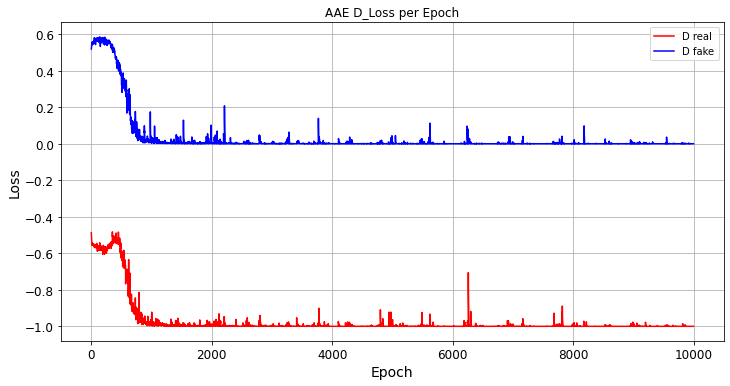

G_Loss: 


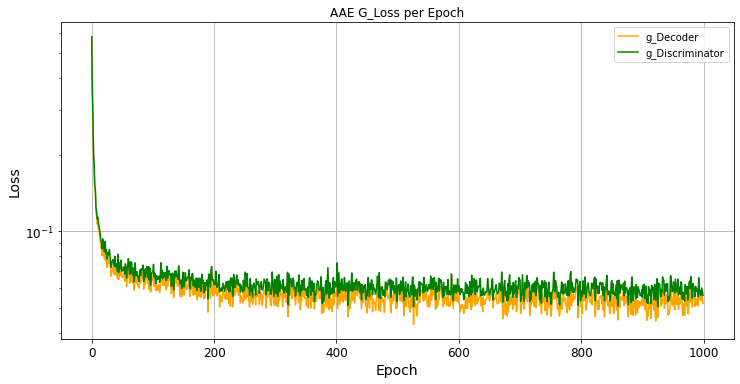

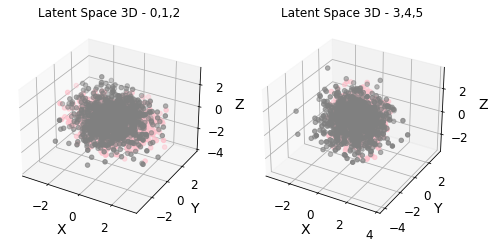

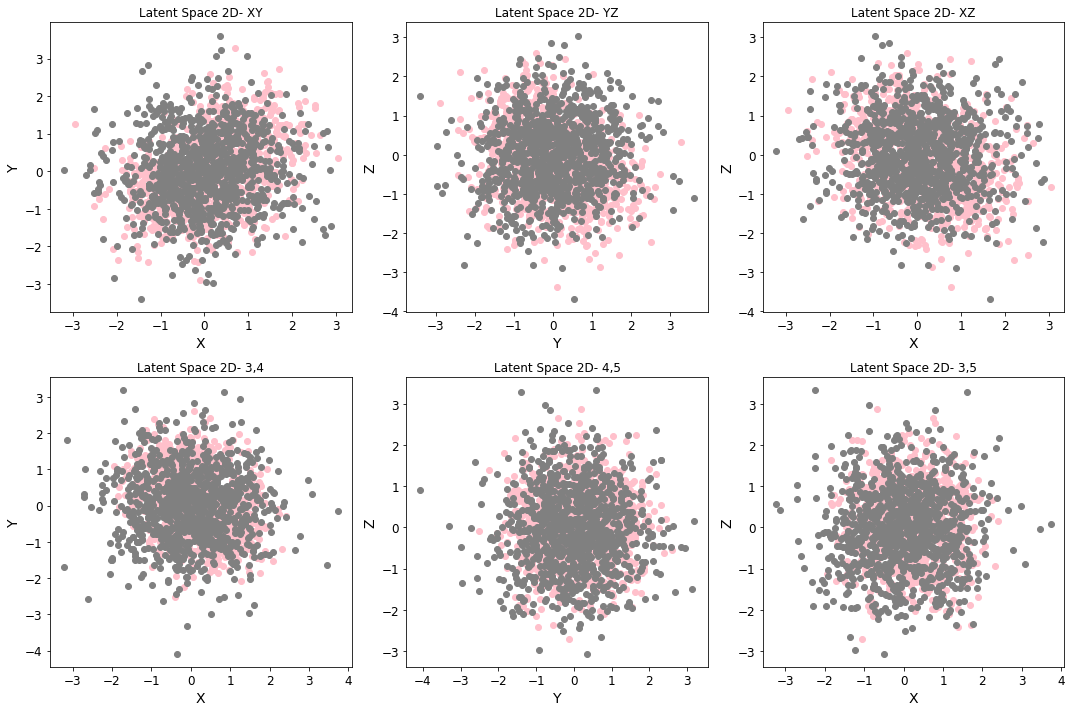

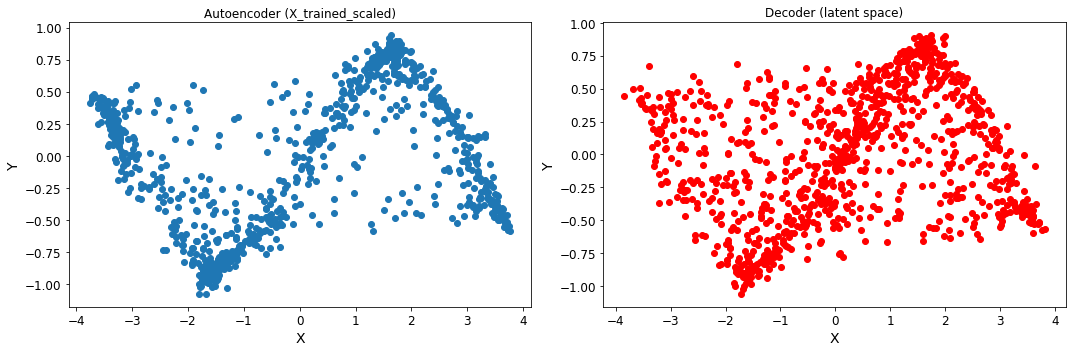

encoder output shape (1000, 6)


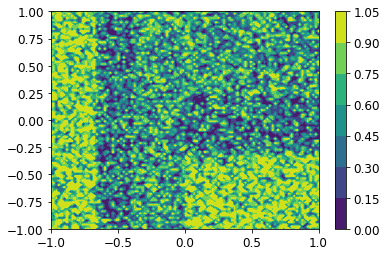

1001 [D real: -0.991835, D fake: 0.003006], [Enc/Dec loss: 0.053888, Enc/Dis: 0.059722]
1002 [D real: -0.946085, D fake: 0.006536], [Enc/Dec loss: 0.059808, Enc/Dis: 0.065939]
1003 [D real: -0.961183, D fake: 0.010600], [Enc/Dec loss: 0.045477, Enc/Dis: 0.052486]
1004 [D real: -0.922320, D fake: 0.011089], [Enc/Dec loss: 0.056430, Enc/Dis: 0.062824]
1005 [D real: -0.936852, D fake: 0.012973], [Enc/Dec loss: 0.053423, Enc/Dis: 0.059359]
1006 [D real: -0.946229, D fake: 0.014523], [Enc/Dec loss: 0.052989, Enc/Dis: 0.058557]
1007 [D real: -0.952197, D fake: 0.016022], [Enc/Dec loss: 0.048578, Enc/Dis: 0.055103]
1008 [D real: -0.955087, D fake: 0.015574], [Enc/Dec loss: 0.046978, Enc/Dis: 0.053687]
1009 [D real: -0.959854, D fake: 0.020767], [Enc/Dec loss: 0.059206, Enc/Dis: 0.064577]
1010 [D real: -0.963584, D fake: 0.021415], [Enc/Dec loss: 0.058988, Enc/Dis: 0.064320]
1011 [D real: -0.998626, D fake: 0.033554], [Enc/Dec loss: 0.055236, Enc/Dis: 0.061068]
1012 [D real: -0.982595, D fake:

1095 [D real: -0.991223, D fake: 0.022397], [Enc/Dec loss: 0.058585, Enc/Dis: 0.062633]
1096 [D real: -0.991672, D fake: 0.018779], [Enc/Dec loss: 0.056329, Enc/Dis: 0.060555]
1097 [D real: -0.992101, D fake: 0.016485], [Enc/Dec loss: 0.051125, Enc/Dis: 0.055522]
1098 [D real: -0.992498, D fake: 0.016257], [Enc/Dec loss: 0.047316, Enc/Dis: 0.051351]
1099 [D real: -0.991854, D fake: 0.014895], [Enc/Dec loss: 0.053346, Enc/Dis: 0.056818]
1100 [D real: -0.992103, D fake: 0.013937], [Enc/Dec loss: 0.052372, Enc/Dis: 0.055725]
1101 [D real: -0.993648, D fake: 0.002767], [Enc/Dec loss: 0.057978, Enc/Dis: 0.061769]
1102 [D real: -0.960158, D fake: 0.006492], [Enc/Dec loss: 0.054236, Enc/Dis: 0.057113]
1103 [D real: -0.972270, D fake: 0.005680], [Enc/Dec loss: 0.053375, Enc/Dis: 0.056449]
1104 [D real: -0.978431, D fake: 0.006253], [Enc/Dec loss: 0.061946, Enc/Dis: 0.065281]
1105 [D real: -0.977767, D fake: 0.005458], [Enc/Dec loss: 0.050386, Enc/Dis: 0.053504]
1106 [D real: -0.981139, D fake:

1189 [D real: -0.989448, D fake: 0.009996], [Enc/Dec loss: 0.052398, Enc/Dis: 0.058534]
1190 [D real: -0.990434, D fake: 0.009614], [Enc/Dec loss: 0.055607, Enc/Dis: 0.062031]
1191 [D real: -0.992448, D fake: 0.002857], [Enc/Dec loss: 0.049220, Enc/Dis: 0.055438]
1192 [D real: -0.992076, D fake: 0.002519], [Enc/Dec loss: 0.053134, Enc/Dis: 0.061108]
1193 [D real: -0.993435, D fake: 0.002506], [Enc/Dec loss: 0.050358, Enc/Dis: 0.057008]
1194 [D real: -0.988534, D fake: 0.002038], [Enc/Dec loss: 0.055591, Enc/Dis: 0.060704]
1195 [D real: -0.989854, D fake: 0.002106], [Enc/Dec loss: 0.053542, Enc/Dis: 0.058140]
1196 [D real: -0.991403, D fake: 0.005680], [Enc/Dec loss: 0.063283, Enc/Dis: 0.067775]
1197 [D real: -0.991943, D fake: 0.005553], [Enc/Dec loss: 0.061720, Enc/Dis: 0.065423]
1198 [D real: -0.992504, D fake: 0.006510], [Enc/Dec loss: 0.060943, Enc/Dis: 0.064168]
1199 [D real: -0.993202, D fake: 0.006582], [Enc/Dec loss: 0.054874, Enc/Dis: 0.058559]
1200 [D real: -0.993659, D fake:

1283 [D real: -0.996620, D fake: 0.002962], [Enc/Dec loss: 0.058479, Enc/Dis: 0.067091]
1284 [D real: -0.996988, D fake: 0.002522], [Enc/Dec loss: 0.046380, Enc/Dis: 0.052804]
1285 [D real: -0.996879, D fake: 0.002462], [Enc/Dec loss: 0.049798, Enc/Dis: 0.053729]
1286 [D real: -0.994319, D fake: 0.002609], [Enc/Dec loss: 0.056200, Enc/Dis: 0.059809]
1287 [D real: -0.994894, D fake: 0.002434], [Enc/Dec loss: 0.052948, Enc/Dis: 0.056956]
1288 [D real: -0.995317, D fake: 0.002653], [Enc/Dec loss: 0.063261, Enc/Dis: 0.067176]
1289 [D real: -0.995795, D fake: 0.002832], [Enc/Dec loss: 0.054447, Enc/Dis: 0.060593]
1290 [D real: -0.996087, D fake: 0.002674], [Enc/Dec loss: 0.056179, Enc/Dis: 0.062880]
1291 [D real: -0.999713, D fake: 0.003675], [Enc/Dec loss: 0.060169, Enc/Dis: 0.067097]
1292 [D real: -0.998266, D fake: 0.003789], [Enc/Dec loss: 0.047689, Enc/Dis: 0.054596]
1293 [D real: -0.998541, D fake: 0.003003], [Enc/Dec loss: 0.053917, Enc/Dis: 0.060405]
1294 [D real: -0.998396, D fake:

1377 [D real: -0.993159, D fake: 0.006174], [Enc/Dec loss: 0.048113, Enc/Dis: 0.053796]
1378 [D real: -0.993966, D fake: 0.005617], [Enc/Dec loss: 0.053847, Enc/Dis: 0.059700]
1379 [D real: -0.994544, D fake: 0.005535], [Enc/Dec loss: 0.057218, Enc/Dis: 0.062967]
1380 [D real: -0.994750, D fake: 0.005032], [Enc/Dec loss: 0.051183, Enc/Dis: 0.056787]
1381 [D real: -0.998024, D fake: 0.000778], [Enc/Dec loss: 0.045406, Enc/Dis: 0.050761]
1382 [D real: -0.998559, D fake: 0.001256], [Enc/Dec loss: 0.059726, Enc/Dis: 0.064867]
1383 [D real: -0.997812, D fake: 0.003977], [Enc/Dec loss: 0.057963, Enc/Dis: 0.062959]
1384 [D real: -0.998251, D fake: 0.003293], [Enc/Dec loss: 0.053107, Enc/Dis: 0.058299]
1385 [D real: -0.997480, D fake: 0.002858], [Enc/Dec loss: 0.054518, Enc/Dis: 0.059914]
1386 [D real: -0.997338, D fake: 0.002658], [Enc/Dec loss: 0.047950, Enc/Dis: 0.053659]
1387 [D real: -0.997576, D fake: 0.002874], [Enc/Dec loss: 0.051191, Enc/Dis: 0.056811]
1388 [D real: -0.997759, D fake:

1471 [D real: -0.994481, D fake: 0.003789], [Enc/Dec loss: 0.051555, Enc/Dis: 0.057874]
1472 [D real: -0.995779, D fake: 0.002499], [Enc/Dec loss: 0.060419, Enc/Dis: 0.065916]
1473 [D real: -0.996428, D fake: 0.001804], [Enc/Dec loss: 0.054255, Enc/Dis: 0.057780]
1474 [D real: -0.996636, D fake: 0.001527], [Enc/Dec loss: 0.055896, Enc/Dis: 0.058973]
1475 [D real: -0.997050, D fake: 0.001327], [Enc/Dec loss: 0.058989, Enc/Dis: 0.061584]
1476 [D real: -0.993210, D fake: 0.001682], [Enc/Dec loss: 0.058492, Enc/Dis: 0.061460]
1477 [D real: -0.987614, D fake: 0.001605], [Enc/Dec loss: 0.053638, Enc/Dis: 0.056813]
1478 [D real: -0.989032, D fake: 0.001589], [Enc/Dec loss: 0.061789, Enc/Dis: 0.065494]
1479 [D real: -0.990053, D fake: 0.001534], [Enc/Dec loss: 0.056505, Enc/Dis: 0.060314]
1480 [D real: -0.990959, D fake: 0.003033], [Enc/Dec loss: 0.059030, Enc/Dis: 0.063364]
1481 [D real: -0.999066, D fake: 0.040940], [Enc/Dec loss: 0.056621, Enc/Dis: 0.060448]
1482 [D real: -0.999200, D fake:

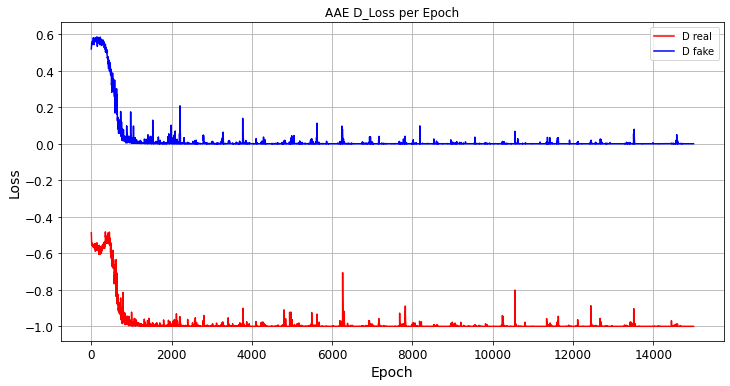

G_Loss: 


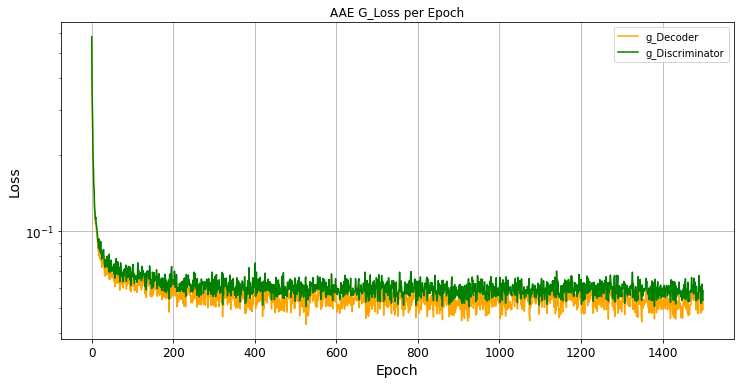

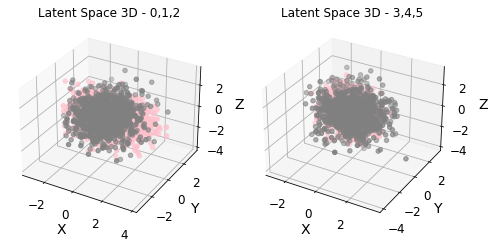

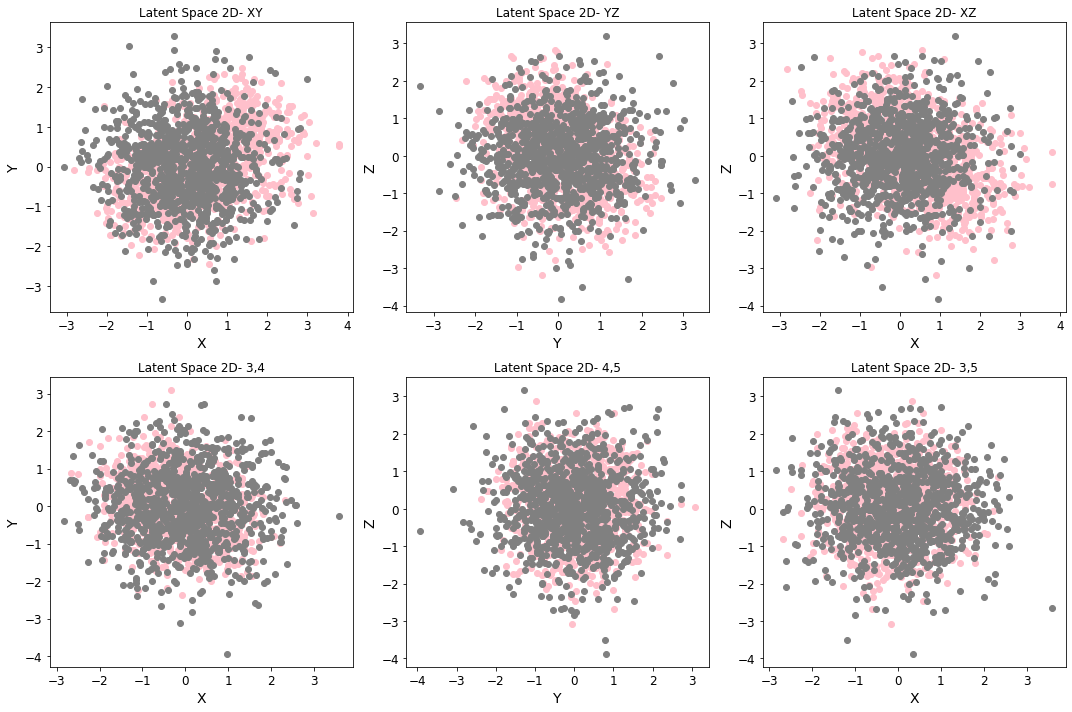

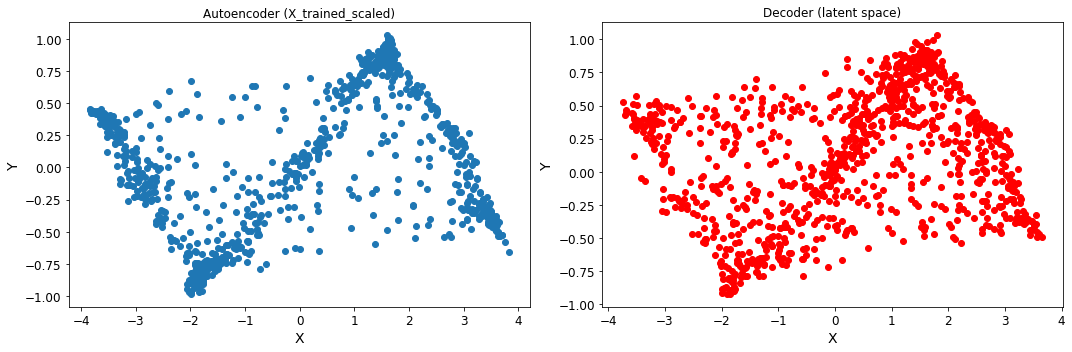

encoder output shape (1000, 6)


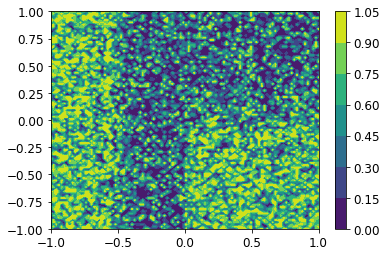

1501 [D real: -0.999337, D fake: 0.000908], [Enc/Dec loss: 0.053896, Enc/Dis: 0.058329]
1502 [D real: -0.998398, D fake: 0.001648], [Enc/Dec loss: 0.052404, Enc/Dis: 0.056916]
1503 [D real: -0.998727, D fake: 0.001999], [Enc/Dec loss: 0.058454, Enc/Dis: 0.061334]
1504 [D real: -0.998719, D fake: 0.002174], [Enc/Dec loss: 0.057166, Enc/Dis: 0.059640]
1505 [D real: -0.998769, D fake: 0.001787], [Enc/Dec loss: 0.058333, Enc/Dis: 0.061211]
1506 [D real: -0.998766, D fake: 0.001632], [Enc/Dec loss: 0.051152, Enc/Dis: 0.056197]
1507 [D real: -0.998433, D fake: 0.001562], [Enc/Dec loss: 0.055532, Enc/Dis: 0.063226]
1508 [D real: -0.998203, D fake: 0.001544], [Enc/Dec loss: 0.053257, Enc/Dis: 0.060184]
1509 [D real: -0.998208, D fake: 0.001517], [Enc/Dec loss: 0.046613, Enc/Dis: 0.053150]
1510 [D real: -0.997953, D fake: 0.001435], [Enc/Dec loss: 0.052528, Enc/Dis: 0.059270]
1511 [D real: -0.997786, D fake: 0.002034], [Enc/Dec loss: 0.051866, Enc/Dis: 0.058703]
1512 [D real: -0.998558, D fake:

1595 [D real: -0.998618, D fake: 0.000707], [Enc/Dec loss: 0.050640, Enc/Dis: 0.054220]
1596 [D real: -0.998442, D fake: 0.000822], [Enc/Dec loss: 0.051342, Enc/Dis: 0.055063]
1597 [D real: -0.998068, D fake: 0.000978], [Enc/Dec loss: 0.051455, Enc/Dis: 0.055983]
1598 [D real: -0.997922, D fake: 0.000865], [Enc/Dec loss: 0.049190, Enc/Dis: 0.055471]
1599 [D real: -0.998116, D fake: 0.000828], [Enc/Dec loss: 0.051587, Enc/Dis: 0.058781]
1600 [D real: -0.997909, D fake: 0.000945], [Enc/Dec loss: 0.047075, Enc/Dis: 0.055870]
1601 [D real: -0.999249, D fake: 0.000640], [Enc/Dec loss: 0.051244, Enc/Dis: 0.058682]
1602 [D real: -0.999506, D fake: 0.001767], [Enc/Dec loss: 0.051334, Enc/Dis: 0.057582]
1603 [D real: -0.986114, D fake: 0.001279], [Enc/Dec loss: 0.045729, Enc/Dis: 0.051743]
1604 [D real: -0.989530, D fake: 0.001095], [Enc/Dec loss: 0.054001, Enc/Dis: 0.059603]
1605 [D real: -0.991594, D fake: 0.003775], [Enc/Dec loss: 0.058744, Enc/Dis: 0.064338]
1606 [D real: -0.992711, D fake:

1689 [D real: -0.997020, D fake: 0.001970], [Enc/Dec loss: 0.055246, Enc/Dis: 0.059605]
1690 [D real: -0.997214, D fake: 0.001913], [Enc/Dec loss: 0.058768, Enc/Dis: 0.063166]
1691 [D real: -0.999632, D fake: 0.000555], [Enc/Dec loss: 0.056916, Enc/Dis: 0.060875]
1692 [D real: -0.999691, D fake: 0.000410], [Enc/Dec loss: 0.059117, Enc/Dis: 0.063039]
1693 [D real: -0.999304, D fake: 0.001763], [Enc/Dec loss: 0.055886, Enc/Dis: 0.059956]
1694 [D real: -0.999022, D fake: 0.001335], [Enc/Dec loss: 0.053474, Enc/Dis: 0.057934]
1695 [D real: -0.999150, D fake: 0.001092], [Enc/Dec loss: 0.050394, Enc/Dis: 0.055164]
1696 [D real: -0.995355, D fake: 0.001356], [Enc/Dec loss: 0.050457, Enc/Dis: 0.057386]
1697 [D real: -0.995965, D fake: 0.001227], [Enc/Dec loss: 0.059391, Enc/Dis: 0.065867]
1698 [D real: -0.996233, D fake: 0.001157], [Enc/Dec loss: 0.058172, Enc/Dis: 0.062515]
1699 [D real: -0.996619, D fake: 0.016714], [Enc/Dec loss: 0.055717, Enc/Dis: 0.058584]
1700 [D real: -0.996868, D fake:

1783 [D real: -0.999248, D fake: 0.000323], [Enc/Dec loss: 0.047333, Enc/Dis: 0.054279]
1784 [D real: -0.999064, D fake: 0.000670], [Enc/Dec loss: 0.051168, Enc/Dis: 0.057111]
1785 [D real: -0.998382, D fake: 0.000594], [Enc/Dec loss: 0.054559, Enc/Dis: 0.059375]
1786 [D real: -0.998639, D fake: 0.000611], [Enc/Dec loss: 0.058706, Enc/Dis: 0.063398]
1787 [D real: -0.993305, D fake: 0.000559], [Enc/Dec loss: 0.055729, Enc/Dis: 0.060612]
1788 [D real: -0.994075, D fake: 0.002436], [Enc/Dec loss: 0.061174, Enc/Dis: 0.066178]
1789 [D real: -0.994721, D fake: 0.002214], [Enc/Dec loss: 0.053445, Enc/Dis: 0.058449]
1790 [D real: -0.995128, D fake: 0.002070], [Enc/Dec loss: 0.047883, Enc/Dis: 0.053006]
1791 [D real: -0.999612, D fake: 0.003086], [Enc/Dec loss: 0.053174, Enc/Dis: 0.058492]
1792 [D real: -0.996299, D fake: 0.002070], [Enc/Dec loss: 0.054634, Enc/Dis: 0.060048]
1793 [D real: -0.997487, D fake: 0.001575], [Enc/Dec loss: 0.055865, Enc/Dis: 0.062129]
1794 [D real: -0.997971, D fake:

1877 [D real: -0.999118, D fake: 0.001455], [Enc/Dec loss: 0.054109, Enc/Dis: 0.059344]
1878 [D real: -0.996229, D fake: 0.001285], [Enc/Dec loss: 0.051488, Enc/Dis: 0.056480]
1879 [D real: -0.996551, D fake: 0.001149], [Enc/Dec loss: 0.053899, Enc/Dis: 0.058963]
1880 [D real: -0.996762, D fake: 0.001044], [Enc/Dec loss: 0.054204, Enc/Dis: 0.059199]
1881 [D real: -0.998982, D fake: 0.000758], [Enc/Dec loss: 0.050175, Enc/Dis: 0.055106]
1882 [D real: -0.998915, D fake: 0.000503], [Enc/Dec loss: 0.059650, Enc/Dis: 0.064451]
1883 [D real: -0.998140, D fake: 0.000592], [Enc/Dec loss: 0.053767, Enc/Dis: 0.058097]
1884 [D real: -0.994036, D fake: 0.000673], [Enc/Dec loss: 0.051792, Enc/Dis: 0.054669]
1885 [D real: -0.995183, D fake: 0.000650], [Enc/Dec loss: 0.063521, Enc/Dis: 0.066703]
1886 [D real: -0.995910, D fake: 0.000945], [Enc/Dec loss: 0.057724, Enc/Dis: 0.061983]
1887 [D real: -0.996479, D fake: 0.001058], [Enc/Dec loss: 0.051878, Enc/Dis: 0.060371]
1888 [D real: -0.996911, D fake:

1971 [D real: -0.999819, D fake: 0.003255], [Enc/Dec loss: 0.048708, Enc/Dis: 0.056203]
1972 [D real: -0.999852, D fake: 0.004275], [Enc/Dec loss: 0.054592, Enc/Dis: 0.061563]
1973 [D real: -0.999809, D fake: 0.002896], [Enc/Dec loss: 0.052769, Enc/Dis: 0.059979]
1974 [D real: -0.999511, D fake: 0.002424], [Enc/Dec loss: 0.053455, Enc/Dis: 0.060355]
1975 [D real: -0.999575, D fake: 0.002030], [Enc/Dec loss: 0.050585, Enc/Dis: 0.057400]
1976 [D real: -0.994885, D fake: 0.001942], [Enc/Dec loss: 0.057302, Enc/Dis: 0.064257]
1977 [D real: -0.995581, D fake: 0.001694], [Enc/Dec loss: 0.047949, Enc/Dis: 0.054912]
1978 [D real: -0.996125, D fake: 0.001659], [Enc/Dec loss: 0.052013, Enc/Dis: 0.059048]
1979 [D real: -0.996521, D fake: 0.001491], [Enc/Dec loss: 0.052642, Enc/Dis: 0.059621]
1980 [D real: -0.996821, D fake: 0.001510], [Enc/Dec loss: 0.051870, Enc/Dis: 0.057043]
1981 [D real: -0.999043, D fake: 0.005146], [Enc/Dec loss: 0.052568, Enc/Dis: 0.057463]
1982 [D real: -0.995260, D fake:

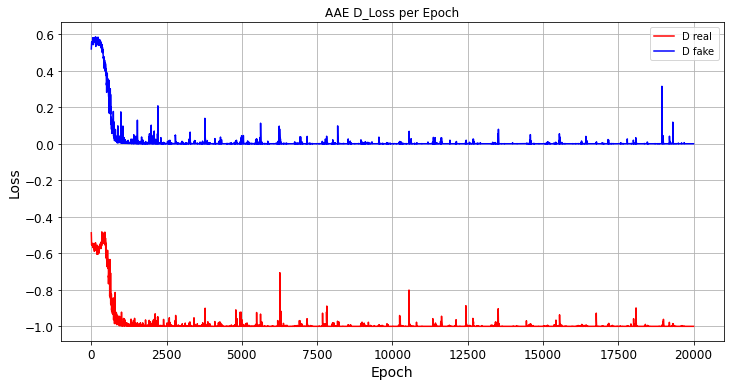

G_Loss: 


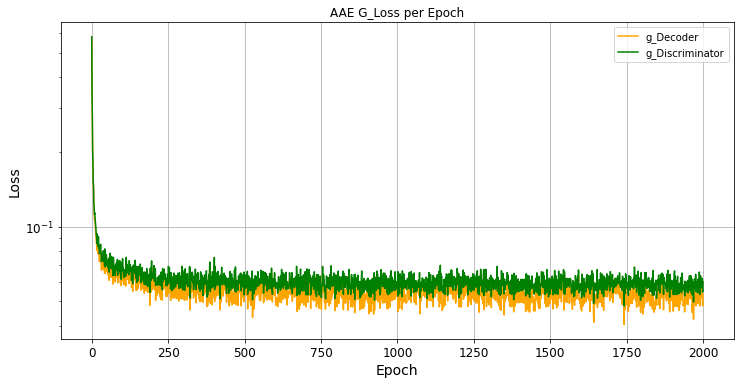

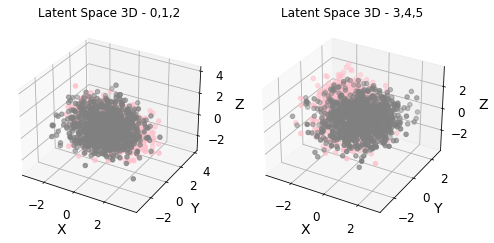

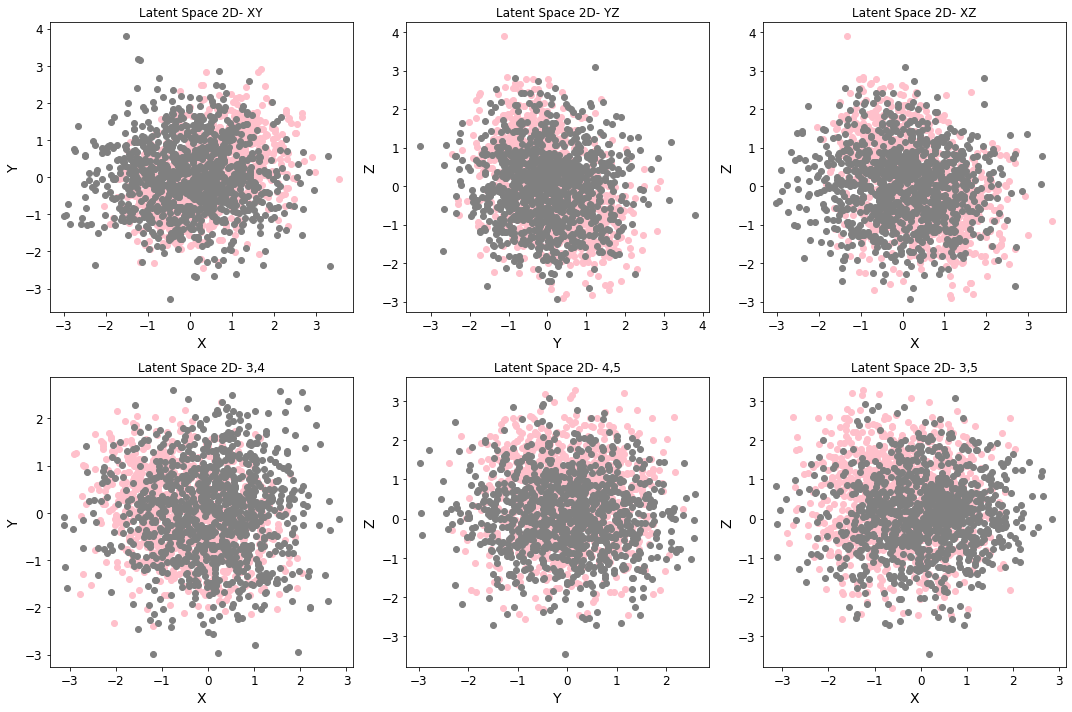

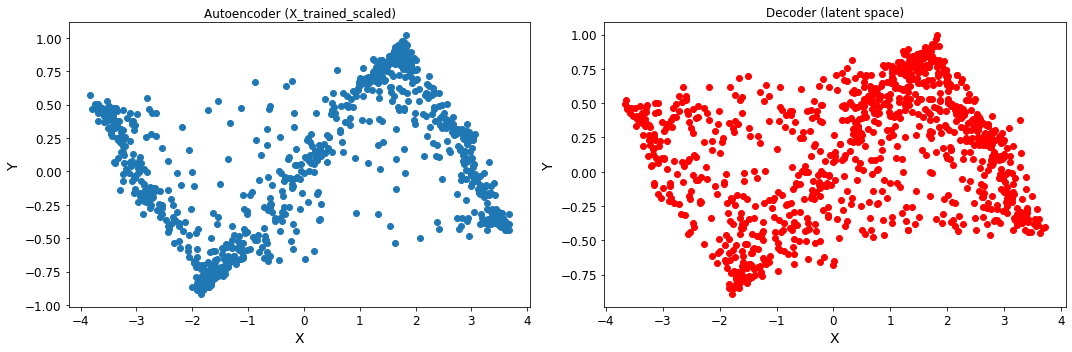

encoder output shape (1000, 6)


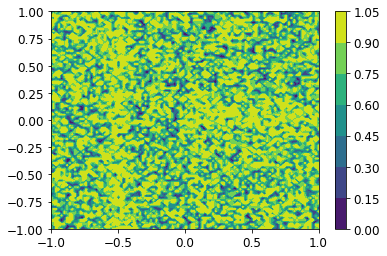

In [10]:
hist = aae.train(i, Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


### Plot Loss

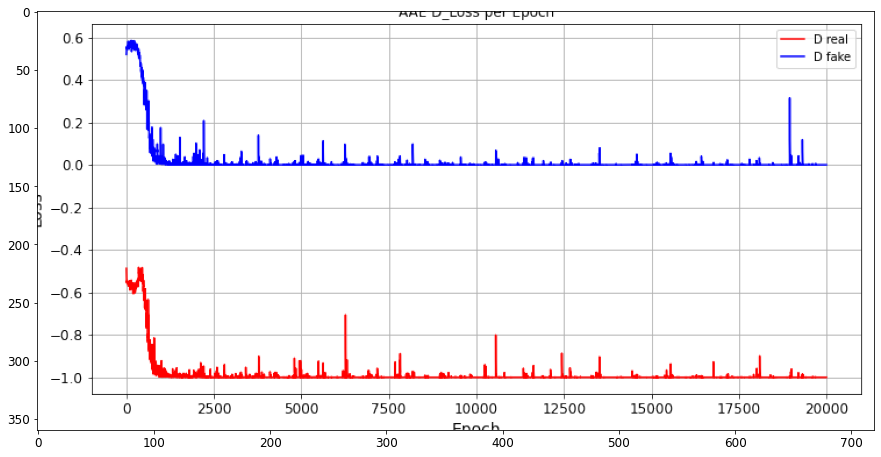

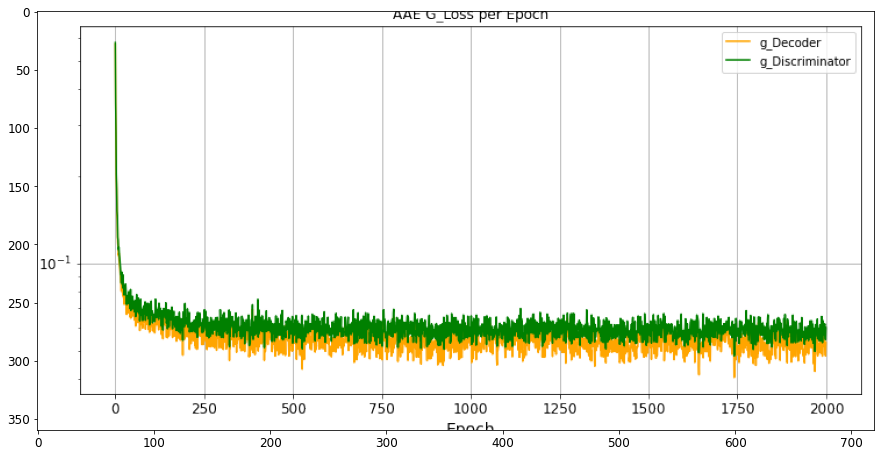

In [11]:
from PIL import Image

#Discriminator Loss
Dloss = Image.open('AAE/Losses/D_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("D_loss",figsize=[15,10])
plt.imshow(Dloss)
#Encoder Loss
Gloss = Image.open('AAE/Losses/G_loss_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("G_loss",figsize=[15,10])
plt.imshow(Gloss)


### Samping from the latent space

In [12]:
epochs = epochs

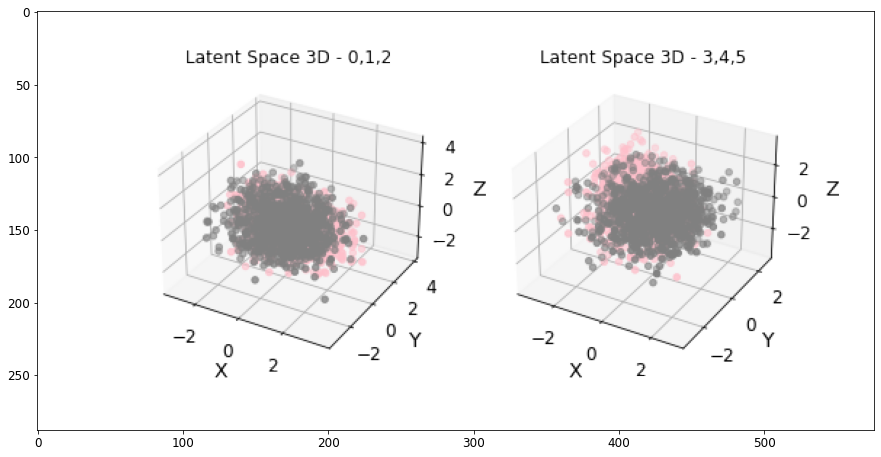

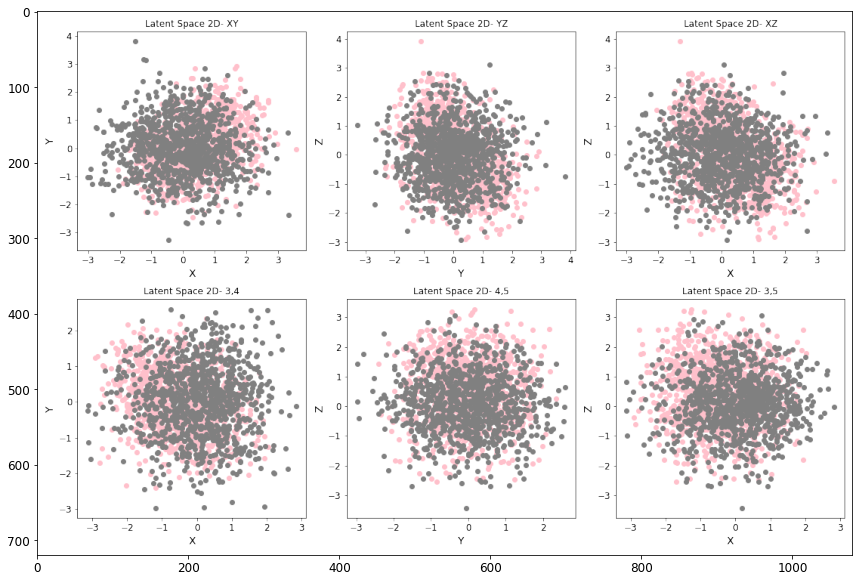

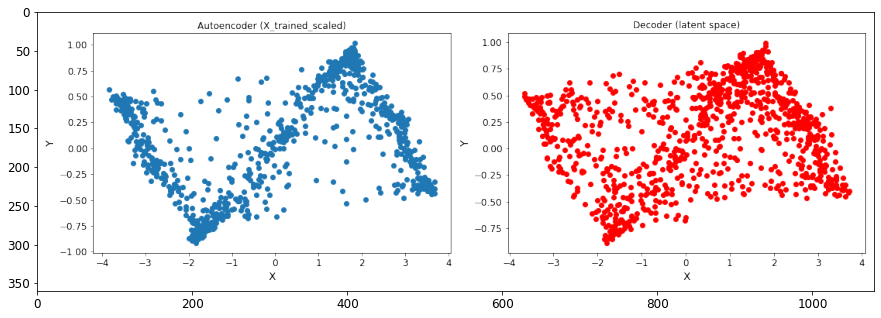

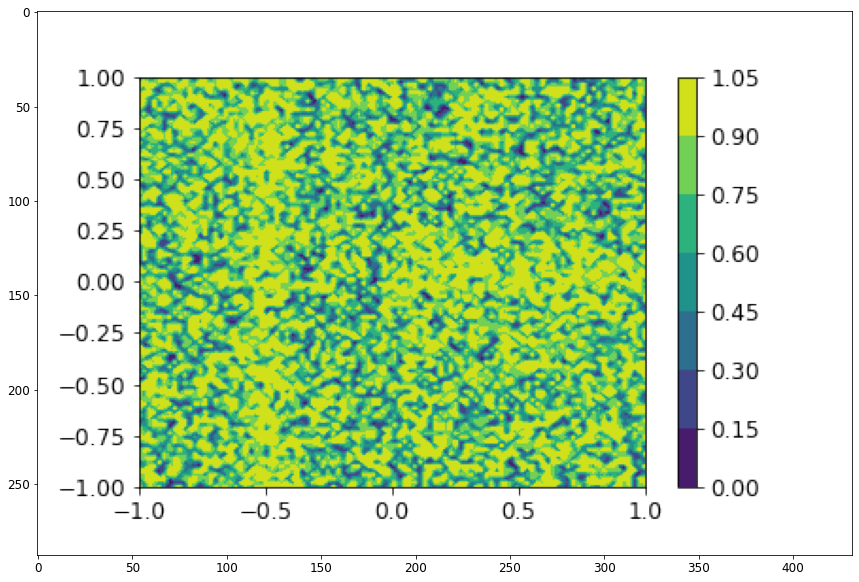

In [13]:
img = Image.open('AAE/Result/v'+str(i)+'_latent_space 3D_'+str(epochs)+'.png')
plt.figure("3D",figsize=[15,10])
plt.imshow(img)

img2 = Image.open('AAE/Result/v'+str(i)+'_Latent_Space 2D_'+str(epochs)+'.png')
plt.figure("2D",figsize=[15,10])
plt.imshow(img2)

img3 = Image.open('AAE/Result/v_'+str(i)+'_epochs_'+str(epochs)+'.png')
plt.figure("Autoencoder",figsize=[15,10])
plt.imshow(img3)

img4 = Image.open('AAE/Result/'+'countour_line_v'+str(i)+'_epochs'+str(epochs)+'.png')
plt.figure("countour_line",figsize=[15,10])
plt.imshow(img4)


# Applying the prediction

In [14]:
i = i

In [15]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset, network

In [16]:
epochs = epochs

In [17]:
encoder = keras.models.load_model('./AAE/Models/encoder_v'+str(i)+'_'+str(epochs))
decoder = keras.models.load_model('./AAE/Models/decoder_v'+str(i)+'_'+str(epochs))
discriminator = keras.models.load_model('./AAE/Models/discriminator_v'+str(i)+'_'+str(epochs))

ValueError: Unknown loss function: wasserstein_loss

In [ ]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

In [ ]:
if scenario in ("3d", "helix"):
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    